In [43]:
pip install contextily

  Using cached contextily-1.1.0-py3-none-any.whl (24 kB)
  Using cached rasterio-1.2.0.tar.gz (2.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Anaconda\python.exe' 'C:\Anaconda\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\박규민\AppData\Local\Temp\tmpqgnvff2g'
       cwd: C:\Users\박규민\AppData\Local\Temp\pip-install-t1qsbrio\rasterio
  Complete output (4 lines):
  Error in sitecustomize; set PYTHONVERBOSE for traceback:
  SyntaxError: (unicode error) 'utf-8' codec can't decode byte 0xb9 in position 0: invalid start byte (sitecustomize.py, line 21)
  INFO:root:Building on Windows requires extra options to setup.py to locate needed GDAL files. More information is available in the README.
  ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
  ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\Anaconda\python.exe' 'C:\Anaconda\lib\site-packages\pip\_vendor\pep517\_in_process.p

In [127]:
import pathlib
import random
from functools import reduce
from collections import defaultdict
import pymssql
import pandas as pd
import geopandas as gpd
import folium
import shapely
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import xgboost
import sklearn.cluster
import tensorflow as tf
import re

In [137]:
conn = pymssql.connect(server='DESKTOP-1JTQS59', database='Sejong')

cursor_1 = conn.cursor()
cursor_2 = conn.cursor()
cursor_1.execute('SELECT lat FROM 상권정보;')
cursor_2.execute('SELECT lon FROM 상권정보;')

li_lon = []
li_lat = []

for i in range(1100):
    lon = cursor_1.fetchone()
    lat = cursor_2.fetchone()
    li_lon.append(lon)
    li_lat.append(lat)
    


df = pd.DataFrame([ x for x in zip(li_lat,li_lon)], columns = ['latitude','longitude'])
print(df)



               latitude          longitude
0     (127.2546661000,)  (127.3003473000,)
1     (127.2963792000,)  (127.2490499000,)
2     (127.2970179000,)  (127.2897260000,)
3     (127.2642273000,)  (127.2898676000,)
4     (127.2898860000,)  (127.2915973000,)
...                 ...                ...
1095  (127.2808248000,)  (127.2912916000,)
1096  (127.2971306000,)  (127.3004968000,)
1097  (127.3006961000,)  (127.3006961000,)
1098  (127.2907098000,)  (127.2635513000,)
1099  (127.2784717000,)  (127.2886976000,)

[1100 rows x 2 columns]


In [108]:
>>> for idx in range(1, 11):
       # 1과 100  사이의 random 한 값 생성하기
       number = random.randint(1, 101)
       # DataFrame에 특정 정보를 이용하여 data 채우기
       df = df.append(pd.DataFrame([[idx, number]], columns=['idx', 'number']), ignore_index=True)
>>> df.set_index('idx', inplace=True)




new_df = pd.DataFrame(columns=['long', 'lat'])
for i in range(100):
    new_df['long'].append(cursor_1.fetchone())
    new_df['lat'].append(cursor_2.fetchone())


ValueError: Location should consist of two numerical values, but (Decimal('127.3003473000'),) of type <class 'tuple'> is not convertible to float.

In [17]:
df = gpd.read_file('도로명주소_건물.geojson')
df.iloc[:,-1]

Index(['BDTYP_CD', 'BULD_NM', 'BULD_NM_DC', 'BULD_SE_CD', 'BUL_MAN_NO',
       'EMD_CD', 'GRO_FLO_CO', 'LNBR_MNNM', 'LNBR_SLNO', 'UND_FLO_CO',
       'geometry'],
      dtype='object')

In [25]:
df["geometry"]

0        MULTIPOLYGON (((127.19039 36.49291, 127.19052 ...
1        MULTIPOLYGON (((127.29546 36.42295, 127.29564 ...
2        MULTIPOLYGON (((127.26217 36.47936, 127.26227 ...
3        MULTIPOLYGON (((127.26235 36.47986, 127.26220 ...
4        MULTIPOLYGON (((127.26173 36.48000, 127.26188 ...
                               ...                        
54952    MULTIPOLYGON (((127.35103 36.45149, 127.35101 ...
54953    MULTIPOLYGON (((127.35115 36.45156, 127.35110 ...
54954    MULTIPOLYGON (((127.35098 36.45162, 127.35091 ...
54955    MULTIPOLYGON (((127.35111 36.45163, 127.35108 ...
54956    MULTIPOLYGON (((127.34910 36.45001, 127.34922 ...
Name: geometry, Length: 54957, dtype: geometry

In [28]:
df2 = df["geometry"]

In [36]:
df.geometry.name

'geometry'

In [35]:
df3 = pd.series[(1,2)]

AttributeError: module 'pandas' has no attribute 'series'

<ipython-input-40-e1ed794e0331>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['centroid_column'] = df.centroid


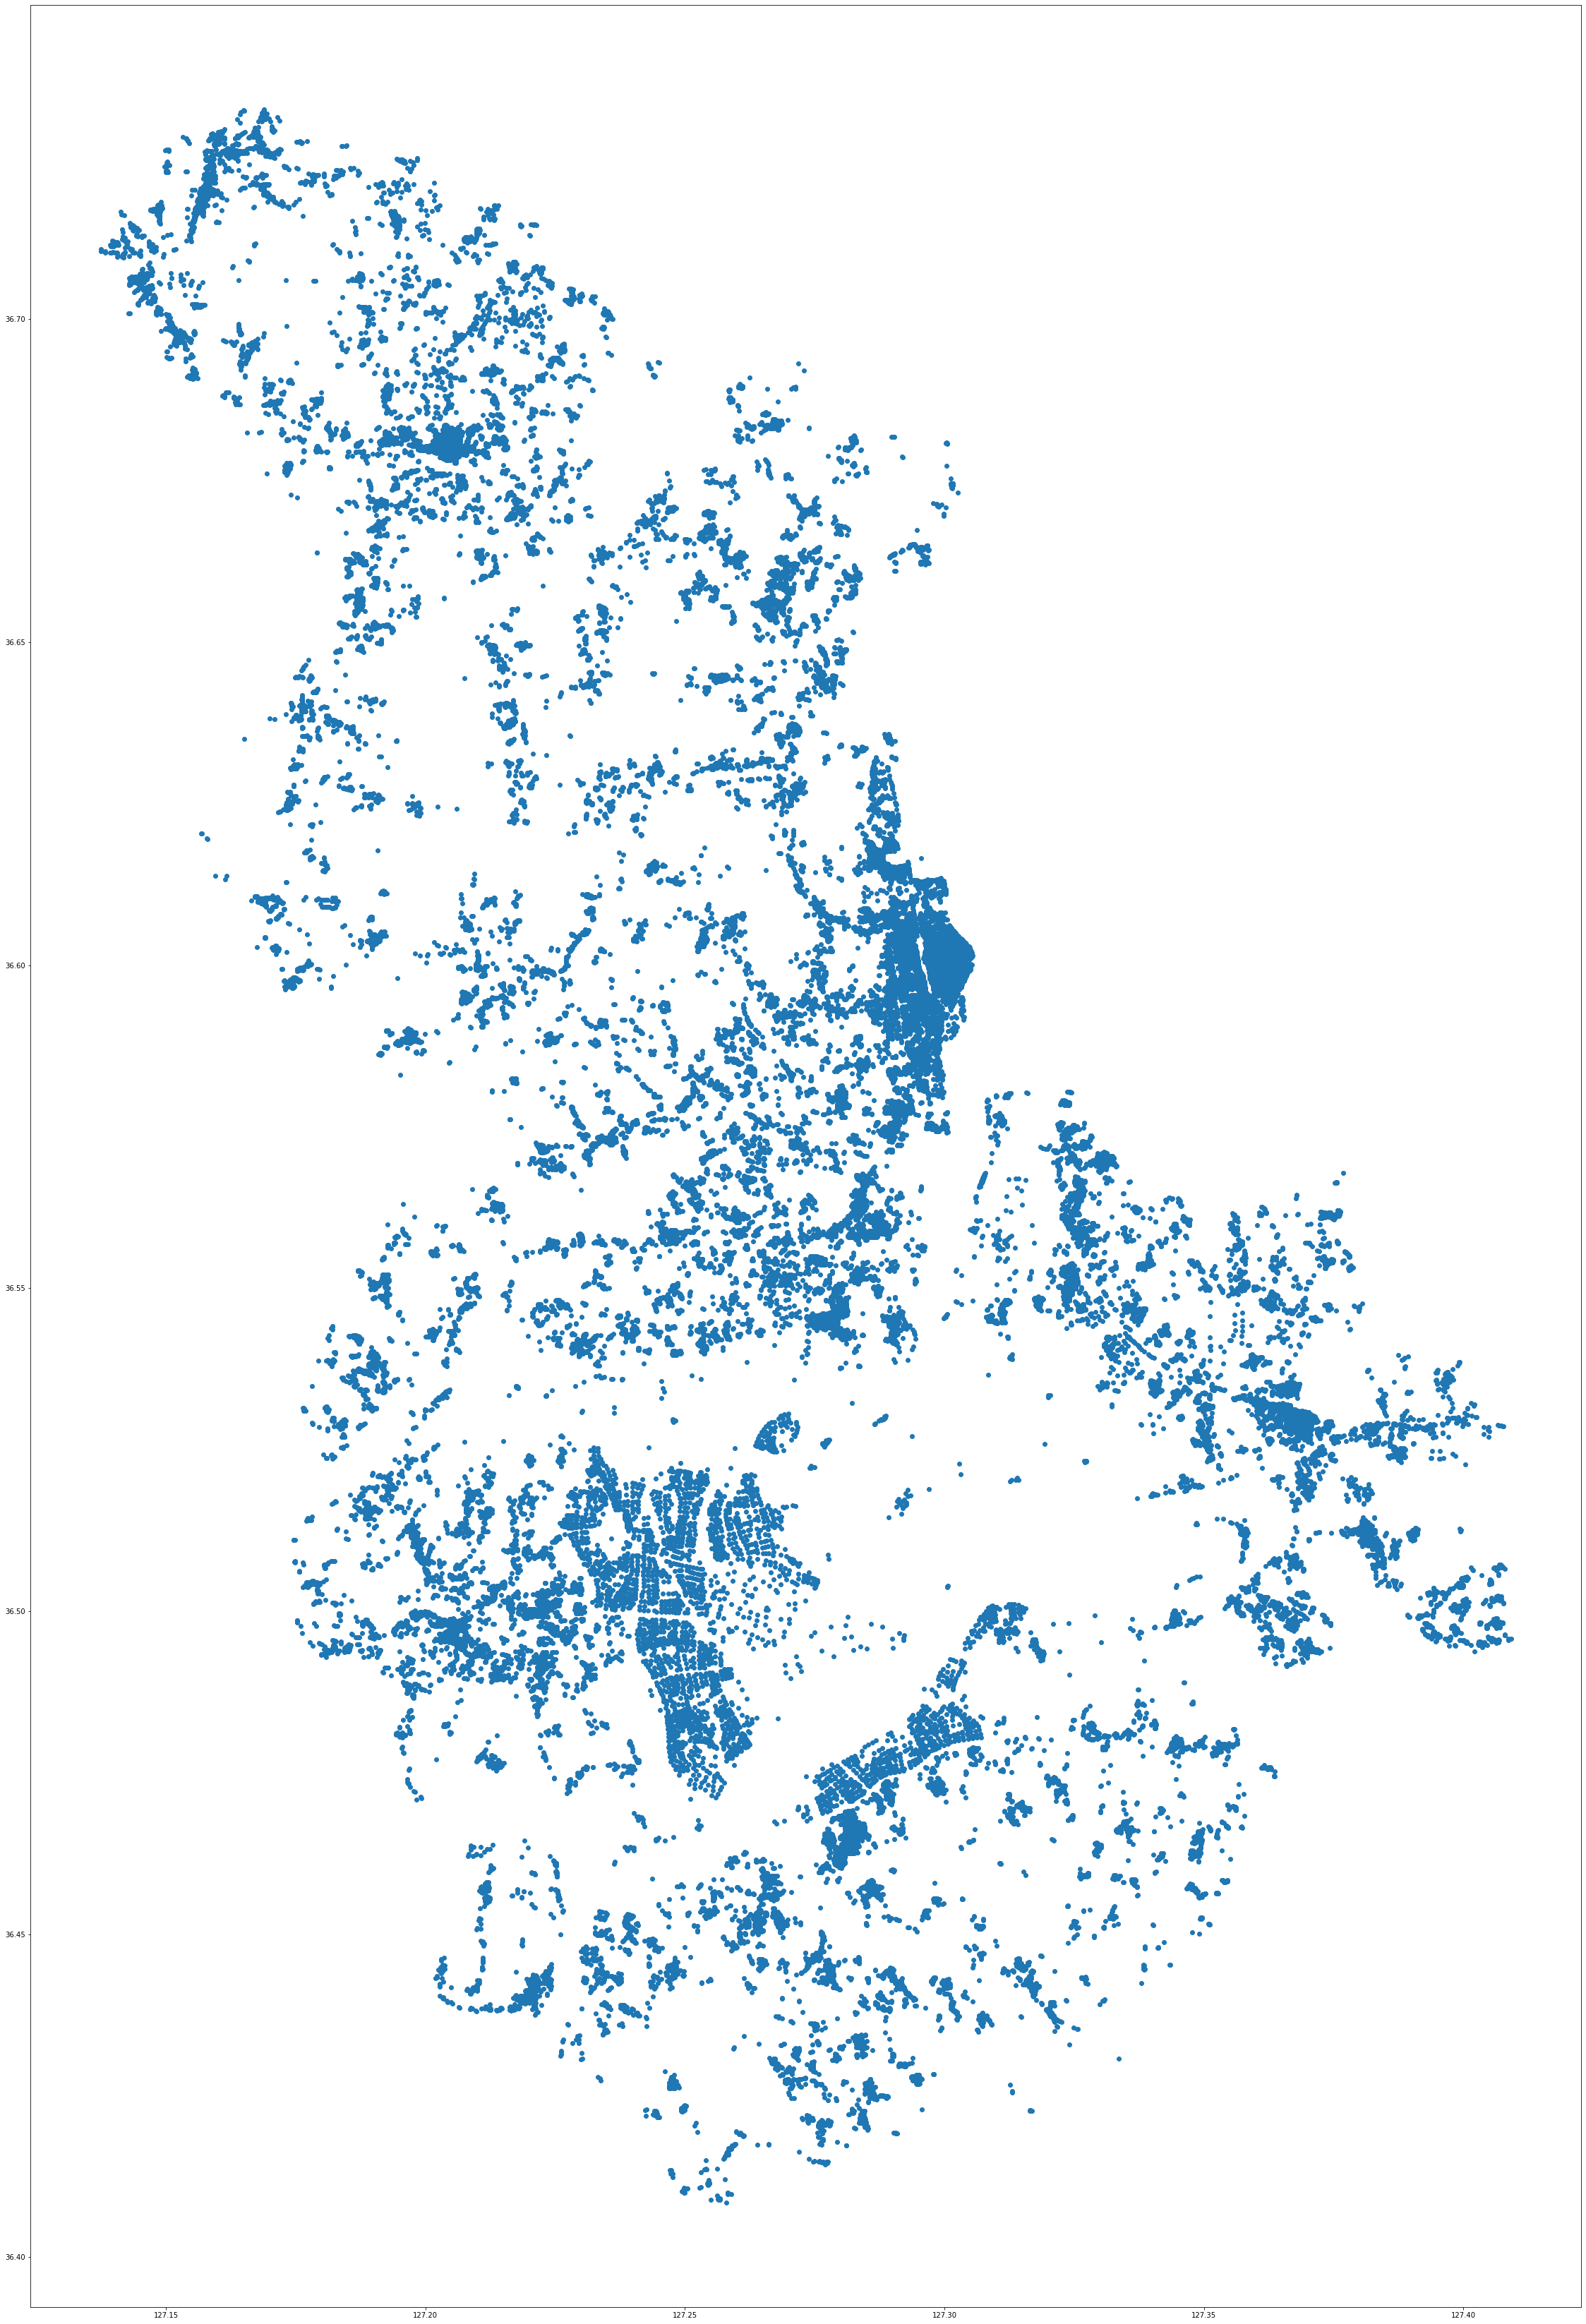

In [40]:
df['centroid_column'] = df.centroid

df = df.set_geometry('centroid_column')
df.plot(figsize=(60,60));

In [130]:
import re

re.findall('\d+', 'abc123def')

['123']